# Сегмент сплайна Эрмита

Это базовый пример построения сплайна Эрмита, который можно использовать как подсказку к лабораторной

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
plt.style.use('../../default_colors.mplstyle')

In [3]:
def H00(t):
    """Базисный полином Эрмита $h_{00}(t)$"""
    return (2*t + 1)*(t - 1)**2

H00.name = r'$h_{00}(t)$'

def H10(t):
    """Базисный полином Эрмита $h_{10}(t)$"""
    return t*(t - 1)**2

H10.name = r'$h_{10}(t)$'

def H01(t):
    """Базисный полином Эрмита $h_{01}(t)$"""
    return (3 - 2*t)*(t**2)

H01.name = r'$h_{01}(t)$'

def H11(t):
    """Базисный полином Эрмита $h_{11}(t)$"""
    return (t - 1)*(t**2)

H11.name = r'$h_{11}(t)$'

In [4]:
def F(t):
    """Вектор опорных функций"""
    A = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [-3, -2, 3, -1],
        [2, 1, -2, 1]
    ], dtype=np.float64)
    return np.matmul(np.array([np.ones_like(t), t, t**2, t**3]).T, A)

In [5]:
def cspline_01(t, p_0, p_1, v_0, v_1):
    """Сегмент сплайна Эрмита"""
    return H00(t) * p_0[:, np.newaxis] + \
           H01(t) * p_1[:, np.newaxis] + \
           H10(t) * v_0[:, np.newaxis] + \
           H11(t) * v_1[:, np.newaxis]


def cspline_02(t, p_0, p_1, v_0, v_1):
    """Сегмент сплайна Эрмита"""
    return np.array([H00(t) * p_0 for t in T]) + \
           np.array([H01(t) * p_1 for t in T]) + \
           np.array([H10(t) * v_0 for t in T]) + \
           np.array([H11(t) * v_1 for t in T])


def cspline_03(t, p_0, p_1, v_0, v_1):
    """Сегмент сплайна Эрмита"""
    M = np.array([p_0, v_0, p_1, v_1])
    return np.matmul(F(t), M)

In [6]:
T = np.linspace(start=0, stop=1, num=100)

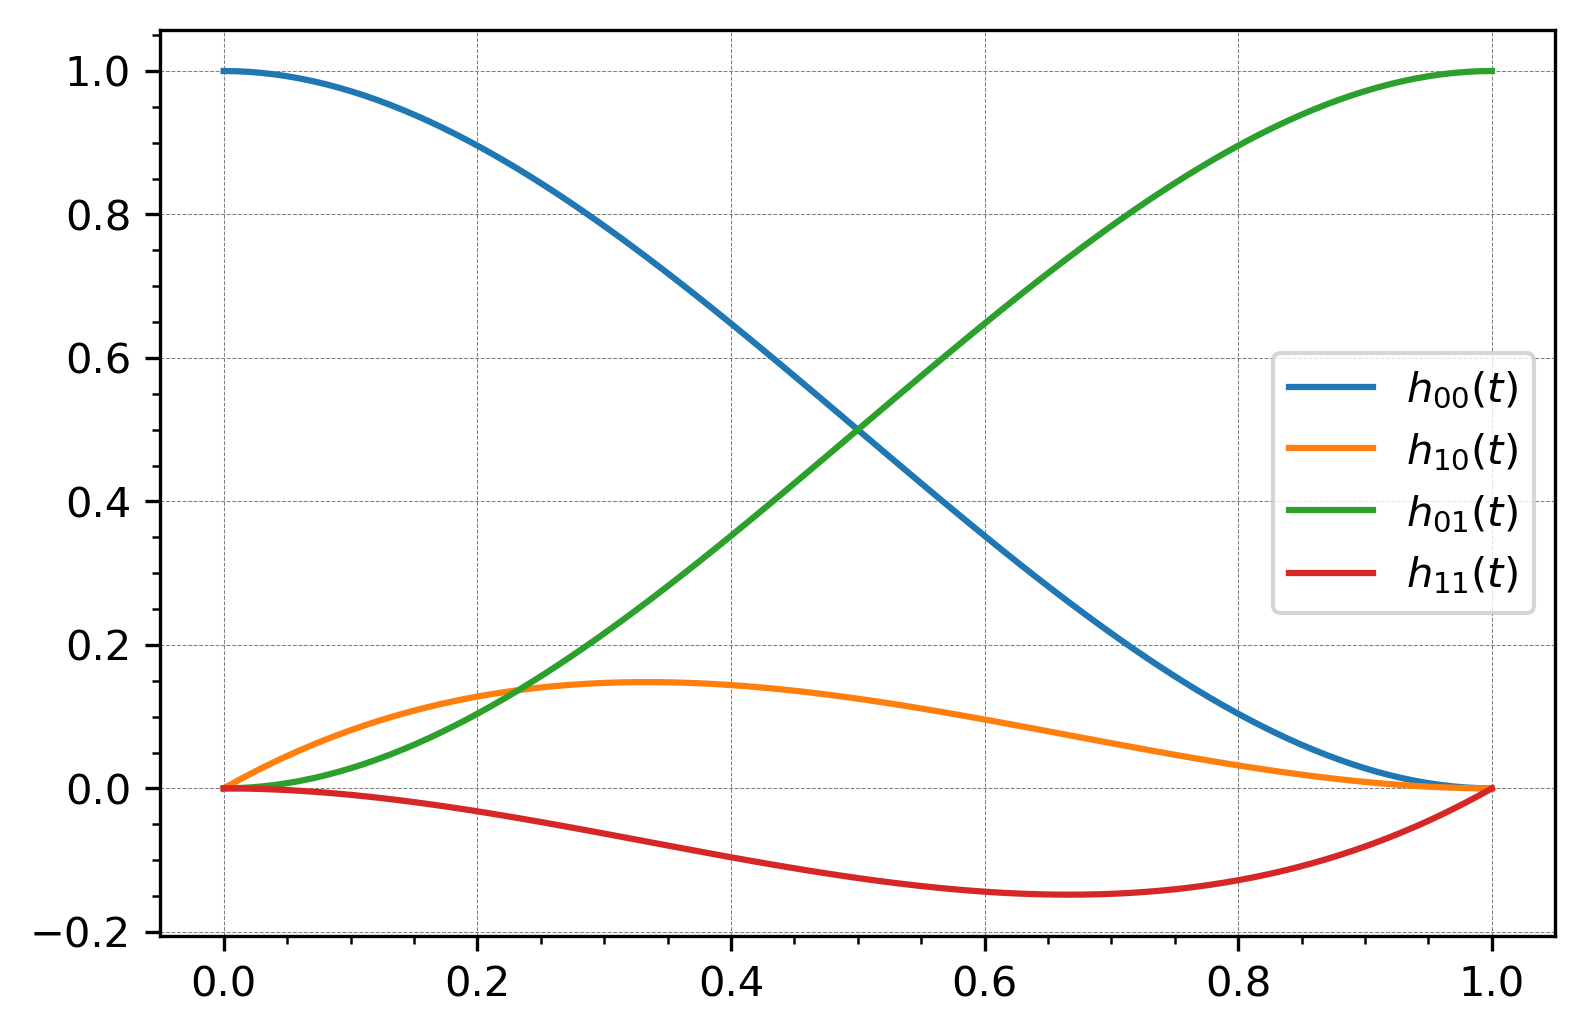

In [7]:
fig01 = plt.figure(num=1, dpi=300)

ax01 = fig01.add_subplot(1, 1, 1)

for h in (H00, H10, H01, H11):
    ax01.plot(T, h(T), label=h.name)

ax01.legend(loc='best')

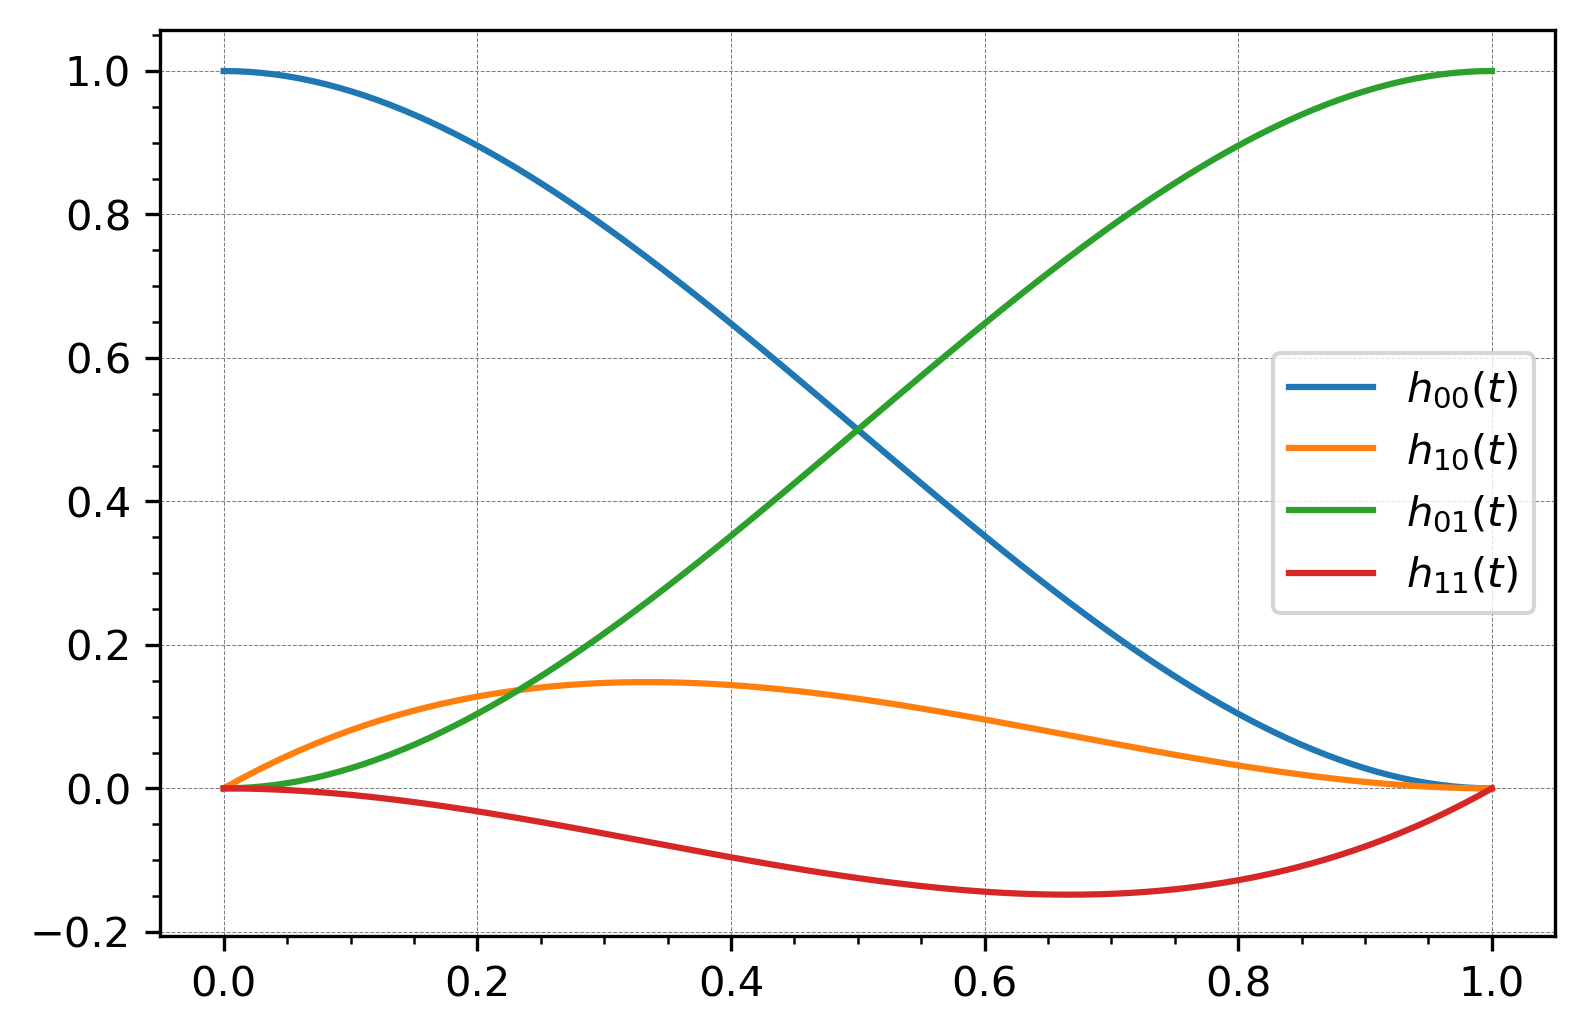

In [8]:
fig02 = plt.figure(num=2, dpi=300)

ax02 = fig02.add_subplot(1, 1, 1)

for h, name in zip(F(T).T, ('$h_{00}(t)$','$h_{10}(t)$', '$h_{01}(t)$', '$h_{11}(t)$')):
    ax02.plot(T, h, label=name)

ax02.legend(loc='best')

In [9]:
p_0 = np.array([0.5, 0.5])
p_1 = np.array([1.5, 0.5])
v_0 = np.array([0.25, 0.5])
v_1 = np.array([0.25, -0.25])

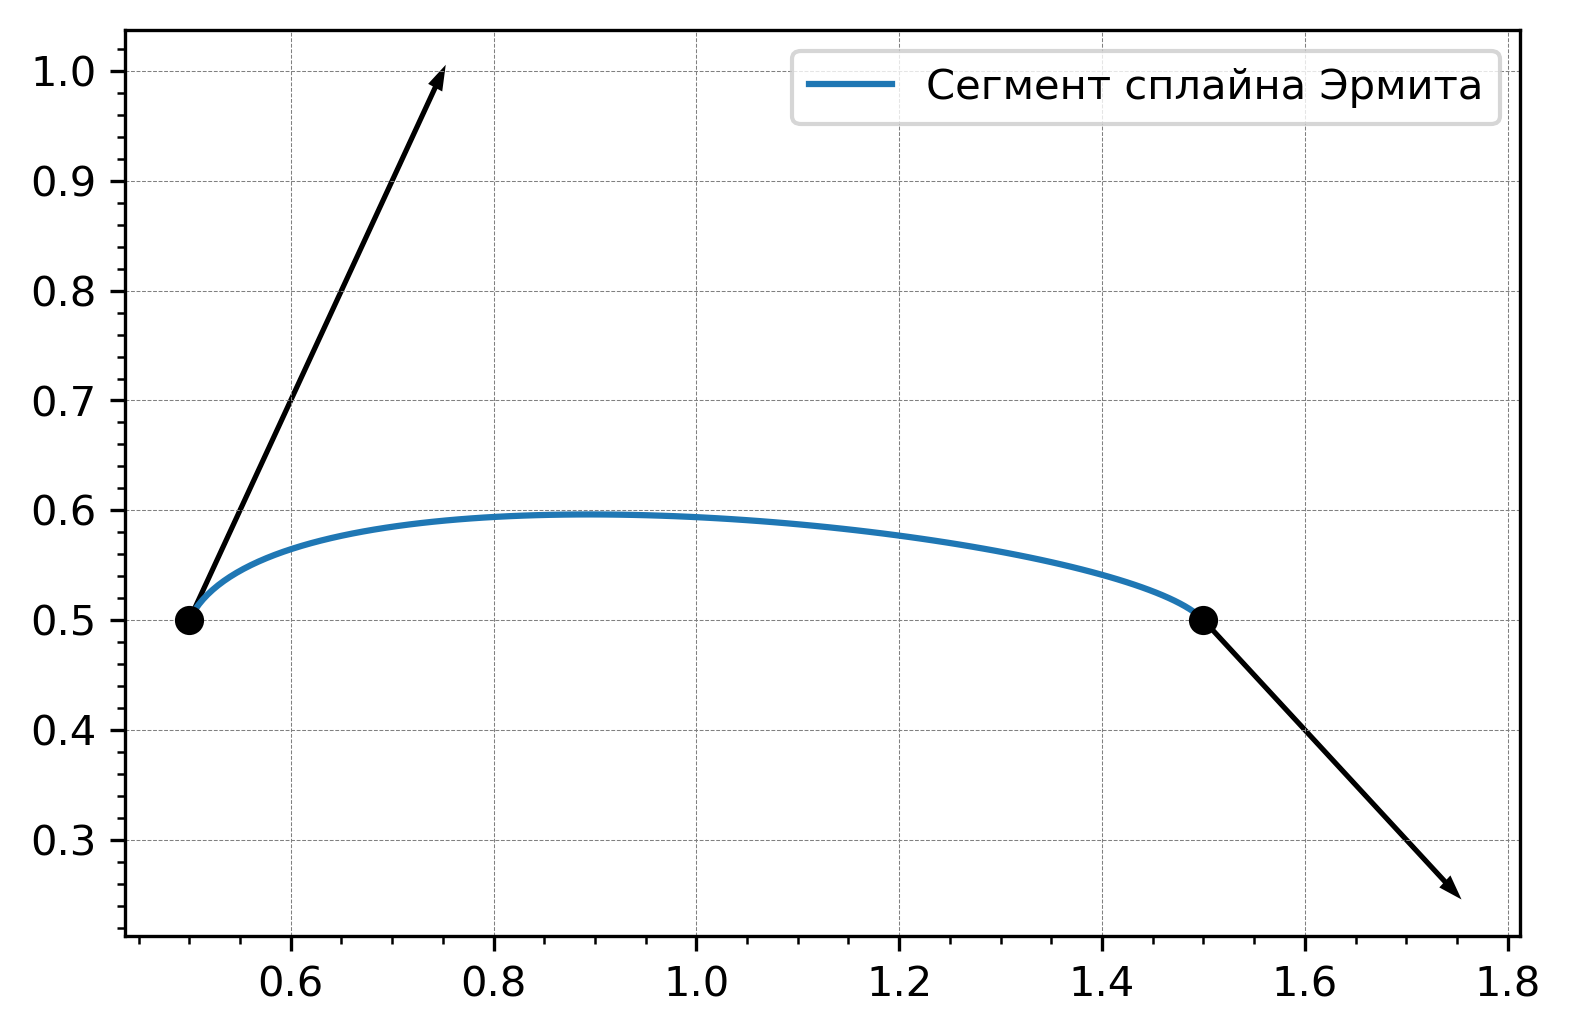

In [10]:
fig03 = plt.figure(num=3, dpi=300)

ax03 = fig03.add_subplot(1, 1, 1)

# ax03.set_xlim(left=0, right=2.5)
# ax03.set_ylim(bottom=0, top=1.5)

# X, Y = cspline_01(T, p_0, p_1, v_0, v_1)
# X, Y = cspline_02(T, p_0, p_1, v_0, v_1).T
X, Y = cspline_03(T, p_0, p_1, v_0, v_1).T

ax03.plot(X, Y, label='Сегмент сплайна Эрмита')
ax03.plot(*p_0, ls='None', marker='o', color='k')
ax03.plot(*p_1, ls='None', marker='o', color='k')

# Стиль стрелок для касательных векторов
style = dict(length_includes_head=True, width=0.001, head_width=0.01, color='k')

ax03.arrow(*p_0, *v_0, **style)
ax03.arrow(*p_1, *v_1, **style)

ax03.legend(loc='best')

In [11]:
%timeit cspline_01(T, p_0, p_1, v_0, v_1)
%timeit cspline_02(T, p_0, p_1, v_0, v_1)
%timeit cspline_03(T, p_0, p_1, v_0, v_1)

37.6 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.71 ms ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
39.4 µs ± 293 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
